In [3]:
import pandas as pd
import missingno as msno
import numpy as np

In [17]:
feature_correlation = pd.read_excel('../input/feature_correlation_matrix.xlsx')
feature_correlation.drop(['index','SK_ID_CURR'], axis = 1, inplace = True)

In [18]:
feature_correlation.shape

(820, 818)

In [19]:
feature_correlation

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
index,-0.025803,0.033421,0.033626,-0.008583,0.006296,0.006550,0.049953,-0.057924,0.028927,-0.003497,...,0.004458,0.000784,0.006472,0.001555,NaN,NaN,NaN,NaN,NaN,0.000421
AMT_ANNUITY,1.000000,0.762520,0.768123,0.204391,0.001472,0.003162,0.029887,0.017051,0.009582,-0.015454,...,-0.001873,-0.003867,0.007015,-0.006428,NaN,NaN,NaN,NaN,NaN,0.090125
AMT_CREDIT,0.762520,1.000000,0.987161,0.166591,0.005411,-0.002334,0.058059,0.004339,0.002960,-0.047653,...,0.009228,0.001098,0.016111,-0.000019,NaN,NaN,NaN,NaN,NaN,0.131704
AMT_GOODS_PRICE,0.768123,0.987161,1.000000,0.169445,0.005815,-0.001688,0.059860,0.004686,0.003228,-0.050084,...,0.009108,0.000790,0.015901,-0.000211,NaN,NaN,NaN,NaN,NaN,0.135152
AMT_INCOME_TOTAL,0.204391,0.166591,0.169445,1.000000,0.002743,0.000767,0.022738,0.006711,0.001447,0.011152,...,-0.004592,-0.005854,-0.002006,-0.009036,NaN,NaN,NaN,NaN,NaN,0.041567
AMT_REQ_CREDIT_BUREAU_DAY,0.001472,0.005411,0.005815,0.002743,1.000000,0.227493,-0.003313,-0.005854,0.214474,-0.003223,...,0.002105,-0.000445,-0.001108,0.001220,NaN,NaN,NaN,NaN,NaN,0.005180
AMT_REQ_CREDIT_BUREAU_HOUR,0.003162,-0.002334,-0.001688,0.000767,0.227493,1.000000,0.002163,-0.004997,0.005566,-0.003515,...,-0.001941,-0.003149,-0.002612,-0.002679,NaN,NaN,NaN,NaN,NaN,-0.000674
AMT_REQ_CREDIT_BUREAU_MON,0.029887,0.058059,0.059860,0.022738,-0.003313,0.002163,1.000000,-0.020010,-0.007698,-0.005760,...,-0.002596,-0.007414,-0.003234,-0.006395,NaN,NaN,NaN,NaN,NaN,0.048931
AMT_REQ_CREDIT_BUREAU_QRT,0.017051,0.004339,0.004686,0.006711,-0.005854,-0.004997,-0.020010,1.000000,-0.020230,0.066743,...,-0.000616,0.005382,-0.004597,0.008006,NaN,NaN,NaN,NaN,NaN,-0.036523
AMT_REQ_CREDIT_BUREAU_WEEK,0.009582,0.002960,0.003228,0.001447,0.214474,0.005566,-0.007698,-0.020230,1.000000,0.016580,...,-0.005744,-0.003945,-0.006152,-0.003626,NaN,NaN,NaN,NaN,NaN,-0.012745


# heuristic algorithm to find the subset of feature where each other has all high similarity larger than the threshold

In [7]:
# step1: find the pair of features whose has passed our threshold(加速後面挑features的速度)
coeifficient_th = 0.7
highly_similar_feature_ls = []
for ix, row in feature_correlation.head(n = 500).iterrows():
    hign_similarity = [i for i in row.tolist()  if i > coeifficient_th or i < -coeifficient_th ]
    hign_similarity = [i for i in hign_similarity if i != 1]
    hign_similarity = [i for i in hign_similarity if i != -1]
    if len(hign_similarity)!= 0:
        # find maximum absolute value of list
        max_similarity = max(hign_similarity, key=abs)
        highly_similar_feature = row[row == max_similarity].index[0]
        print ('max_similarity',max_similarity)
        #print ('highly_similar_feature',highly_similar_feature)
        #print ('feature',ix)
        highly_similar_feature_ls.append(ix)
        highly_similar_feature_ls.append(highly_similar_feature)
highly_similar_feature_ls = list(set(highly_similar_feature_ls))

max_similarity 0.768122889195061
max_similarity 0.987161038336051
max_similarity 0.987161038336051
max_similarity 0.995340484918028
max_similarity 0.995340484918028
max_similarity 0.977662607998254
max_similarity 0.9940377710379
max_similarity 0.9940377710379
max_similarity 0.976862697194755
max_similarity 0.87891091303889
max_similarity 0.87891091303889
max_similarity 0.9959329135616
max_similarity 0.9959329135616
max_similarity 0.980136884783396
max_similarity 0.865227377706797
max_similarity 0.865227377706797
max_similarity 0.99607827194931
max_similarity 0.99607827194931
max_similarity 0.983331607135064
max_similarity 0.996845796019733
max_similarity 0.996845796019733
max_similarity 0.980909165461955
max_similarity -0.999877182075348
max_similarity 0.997004232129737
max_similarity 0.997004232129737
max_similarity 0.988220477647515
max_similarity 0.99719714005408
max_similarity 0.99719714005408
max_similarity 0.988384750841507
max_similarity 0.991608504734728
max_similarity 0.991608

In [12]:
len(highly_similar_feature_ls) 

237

In [9]:
def pair_similarity(f1, f2):
    '''
    paras:
    f1:str
    f2:str
    '''
    return feature_correlation.iloc[(feature_correlation.index == f1)][[f2]].iloc[0][0]
coeifficient_th = 0.7
ratio_that_similar_to_all_feautres = 0.05
# step2: find the subset of features overpass the theeshold with all features from pair of features set
output_features = []
for e_f in highly_similar_feature_ls:
    check_if_all_features_are_similar = [1.0 if abs(pair_similarity(e_f, e_f1)) > coeifficient_th else 0 for e_f1 in highly_similar_feature_ls ]
    num_features_the_feautre_correlate_w_others = int(len(check_if_all_features_are_similar) * ratio_that_similar_to_all_feautres)
    if check_if_all_features_are_similar.count(1.0) > num_features_the_feautre_correlate_w_others:
        print (e_f)
        output_features.append(e_f)

num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
ELEVATORS_AVG
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
APARTMENTS_MEDI
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_corre

num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_the_feautre_correlate_w_others 11
num_features_

In [11]:
len(output_features)

13

In [20]:
highly_similar_feature_ls = output_features

In [21]:
highly_similar_feature_ls

['ELEVATORS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'ELEVATORS_MEDI',
 'LIVINGAREA_AVG',
 'ELEVATORS_MODE',
 'LIVINGAREA_MEDI',
 'APARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'TOTALAREA_MODE',
 'LIVINGAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG']

In [22]:
# loading data
df = pd.read_hdf('../features/base_featurs.h5','base_featurs')
print (df.shape)
copy_for_the_following_merge = df[['SK_ID_CURR','TARGET']].copy()
no_need_to_inpute = ['index']
df.drop(no_need_to_inpute, axis = 1, inplace = True)
# handling with infinity
df.replace([np.inf, -np.inf], np.nan, inplace = True)
print (df.shape)


(356251, 281)
(356251, 280)


In [23]:
base_feature_worth_imputing_set = set(df.columns.tolist()) & set(highly_similar_feature_ls)
len(base_feature_worth_imputing_set)

2

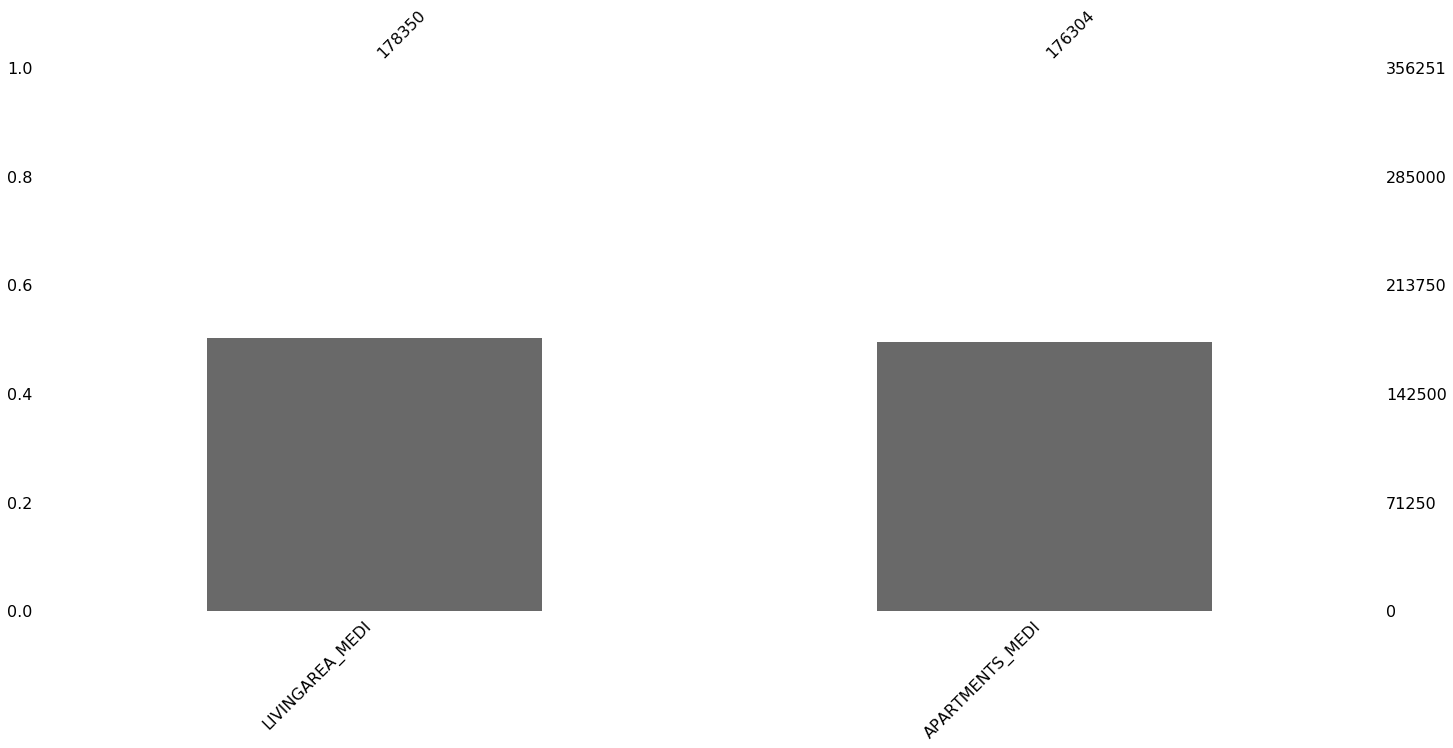

In [194]:
msno.bar(df[list(base_feature_worth_imputing_set)])

# knn

In [203]:
from ycimpute.imputer.knnimput import KNN # inputation library
k = 65
X_missing_df = df[list(base_feature_worth_imputing_set)]
print (X_missing_df.shape)
small_df_ls = []
num_split = 5
previous_step = None
for i, step in enumerate(np.arange(0, X_missing_df.shape[0], step = int(X_missing_df.shape[0] / num_split))):
    # for memory problem, we cannot feed all the data points into algorithm, which depends on row and n_features
    if i == 0:
        pass
    elif i == 1:
        small_df_ls.append(X_missing_df[0: step])
        previous_step = step
    elif i == (num_split):
        small_df_ls.append(X_missing_df[previous_step: ])
        break
    else:
        small_df_ls.append(X_missing_df[previous_step: step])
        previous_step = step

(356251, 2)


In [204]:
len(small_df_ls[0])

71250

In [205]:
#-------------------
# imputating
#------------------
k = 65 # by cv
small_df_filled_ls = []
for small_df in small_df_ls:
    X_missing = small_df.copy()
    # core algorithm: input should be array
    X_filled = KNN(k = k).complete(X_missing.values)
    small_df_filled_ls.append(pd.DataFrame(X_filled, columns = X_missing.columns))


KeyboardInterrupt: 

In [ ]:
X_filled1 = pd.concat(small_df_filled_ls, axis = 0)
print (X_filled1.shape)

In [ ]:
msno.bar(X_filled1)

In [132]:
# reload again for filling
df = pd.read_hdf('../features/base_featurs.h5','base_featurs')
print (df.shape)
copy_for_the_following_merge = df[['SK_ID_CURR','TARGET']].copy()
no_need_to_inpute = ['index']
df.drop(no_need_to_inpute, axis = 1, inplace = True)
# handling with infinity
df.replace([np.inf, -np.inf], np.nan, inplace = True)
for f_in_same_cluster in X_filled1.columns.tolist():
    print ('featurs', f_in_same_cluster)
    df[f_in_same_cluster] = X_filled1[f_in_same_cluster].tolist()

(356251, 281)
featurs ENTRANCES_MEDI
featurs PREV_RATE_DOWN_PAYMENT_MEAN
featurs BURO_AMT_CREDIT_MAX_OVERDUE_MEAN
featurs OBS_60_CNT_SOCIAL_CIRCLE
featurs BURO_CREDIT_TYPE_Microloan_MEAN
featurs PREV_NAME_PAYMENT_TYPE_XNA_MEAN
featurs AMT_GOODS_PRICE
featurs ACTIVE_AMT_CREDIT_SUM_DEBT_MAX
featurs APARTMENTS_MEDI
featurs PREV_NAME_GOODS_CATEGORY_XNA_MEAN
featurs BURO_AMT_CREDIT_SUM_DEBT_SUM
featurs AMT_CREDIT
featurs NEW_RATIO_BURO_AMT_CREDIT_SUM_SUM
featurs PREV_NAME_CONTRACT_TYPE_Consumer loans_MEAN
featurs YEARS_BEGINEXPLUATATION_MEDI
featurs BURO_CREDIT_ACTIVE_Closed_MEAN
featurs ACTIVE_AMT_CREDIT_SUM_DEBT_SUM
featurs LIVINGAREA_MEDI


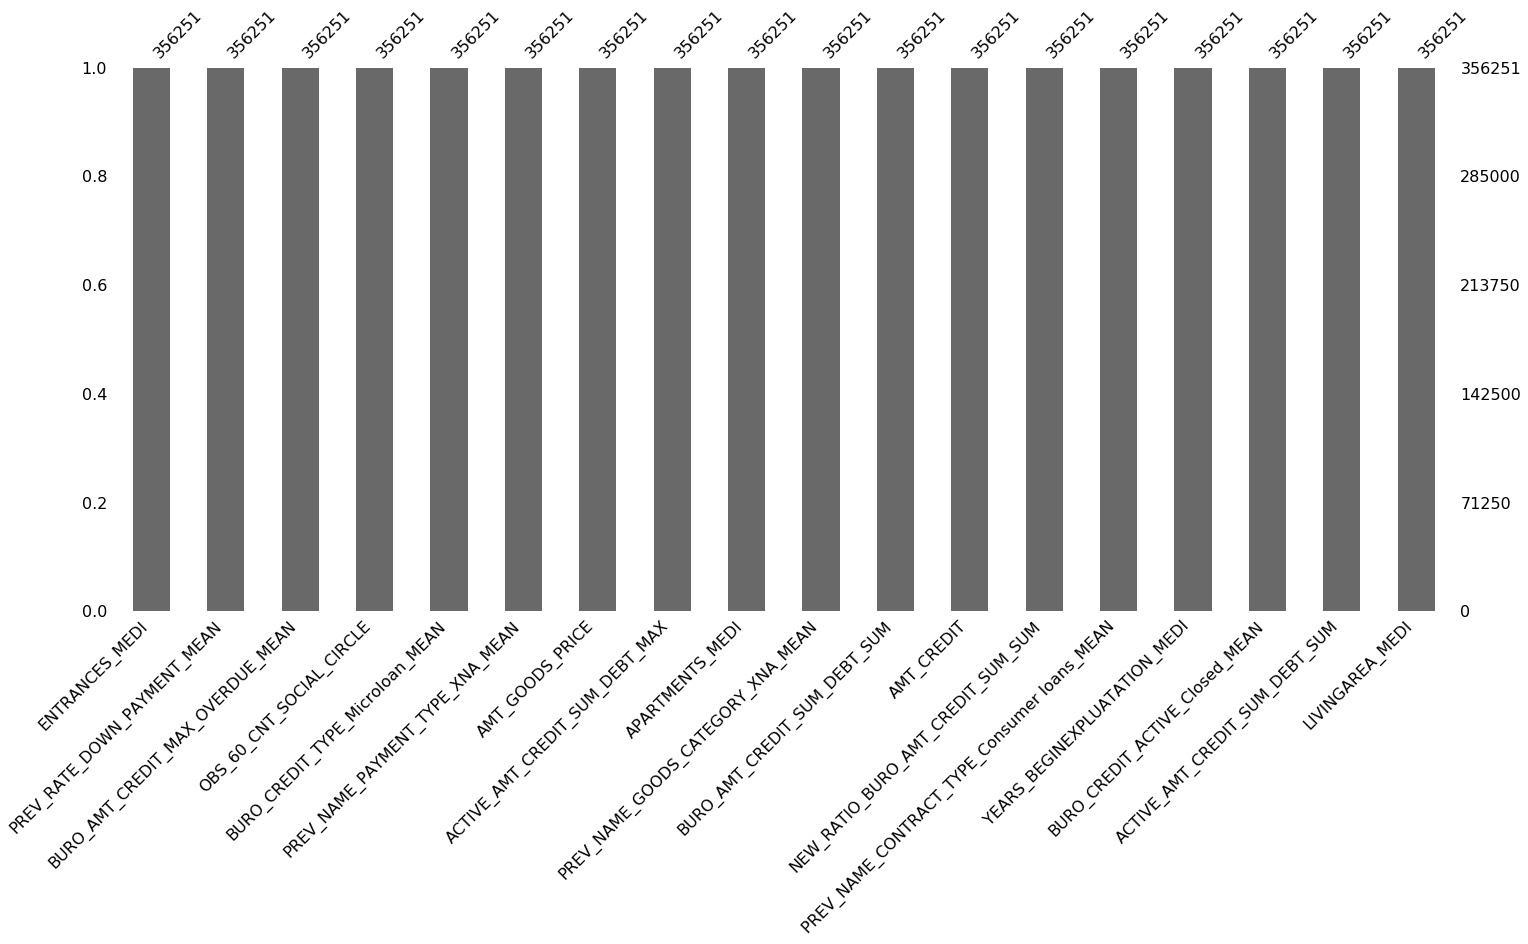

In [133]:
# check
msno.bar(df[list(base_feature_worth_imputing_set)])

In [134]:
import os
#-------------------
# save
#-------------------
output_path = '../features/filled_by_knn'
if not os.path.isdir(output_path):
    os.mkdir(output_path)

df.to_hdf(
    os.path.join(output_path, 'base_featurs_filled_knn_k_65_corr_0_95_with_10_fold.h5'), 
    'base_featurs_filled_knn_k_65_corr_0_95_with_10_fold')
